# load Argo data for DAS analysis (July 2019)

to do:

- [ ] add map with locations
- [X] compare and combine with climatology (WOA)

Data downloaded from [EuroArgo website](https://dataselection.euro-argo.eu)


In [1]:
import os
from glob import glob

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import dashydro.hydro as hy

hours = 3600
days = 86400

--- 
### load data

In [2]:
#root_dir = "/Users/aponte/Data/das"
root_dir = "/Users/aponte/Cloud/Dropbox/Public/das"
data_dir = os.path.join(root_dir, "argo/")

nc_files = glob(data_dir+"/*.nc")[:-1] # last files has issues don't know why
codes = [f.split("_")[-1].replace(".nc","") for f in nc_files]
print(codes)

['6902969', '6901250', '6902954', '3901849']


In [3]:
data = {int(c): hy.load_argo_nc(f) for f, c in zip(nc_files, codes)}

Load WOA climatology

In [4]:
woa = hy.load_woa(lon=5.9, lat=42.8) # approximate cable coordinates

Data nearby the cable (from EuroArgo maps):

- Float 6901250 (cycles 137, 38)
- Float 6902969 (cycles 32)

---
### inspect 6901250

In [5]:
ds = data[6901250]
ds_smooth = hy.smooth(ds, dz=5, depth_max=100)

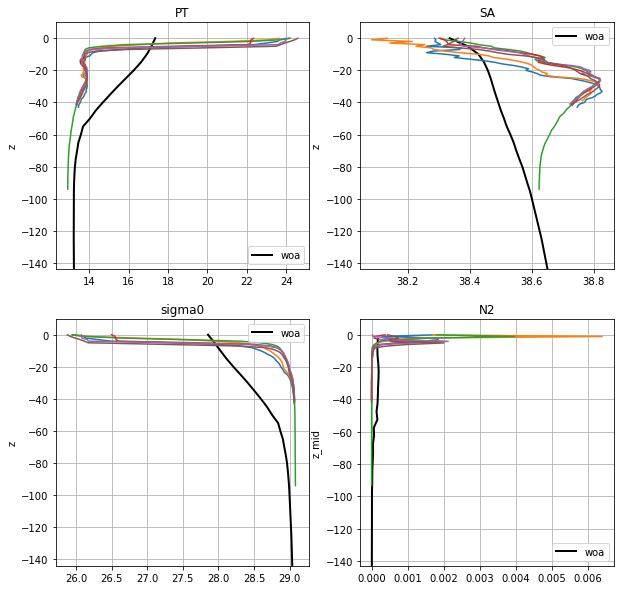

In [7]:
hy.plot_argo_profiles(ds, woa=woa);

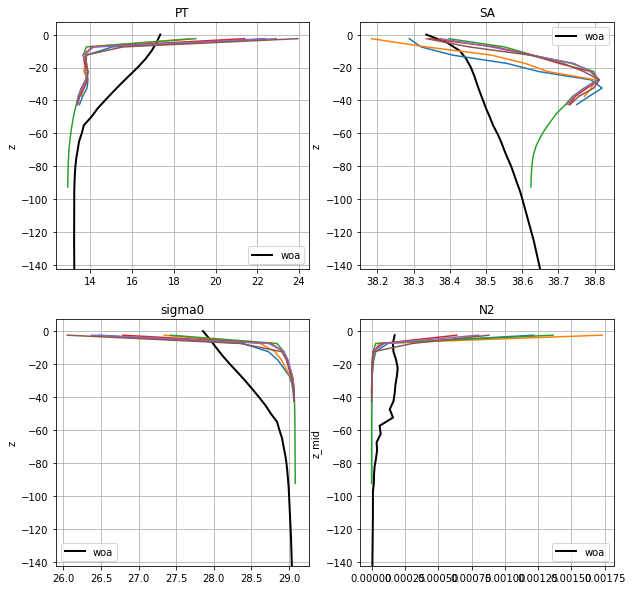

In [9]:
hy.plot_argo_profiles(ds_smooth, woa=woa);

/Users/aponte/.miniconda3/envs/dashydro/lib/python3.8/site-packages/xarray/core/computation.py:727: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


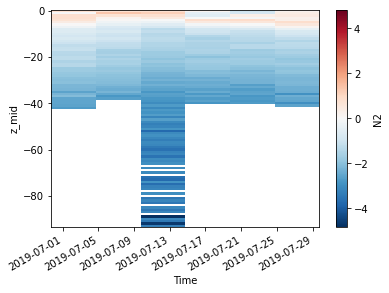

In [10]:
np.log10(ds.N2*hours).plot(y="z_mid");  # in cycles per hours

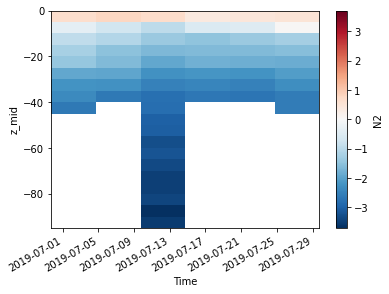

In [11]:
np.log10(ds_smooth.N2*hours).plot(y="z_mid"); # in cycles per hours

Convert into period in hours

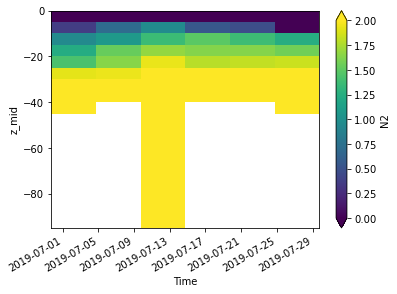

In [12]:
np.log10(1/ds_smooth.N2/hours).plot(y="z_mid", vmin=0, vmax=2);

Vertical gradient of temperature

Values are quickly around 1e-3 degC / m

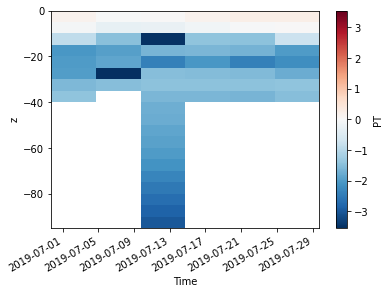

In [13]:
np.log10(abs(-ds_smooth.PT.differentiate("DEPTH"))).plot(y="z")

---

### inspect 6902969

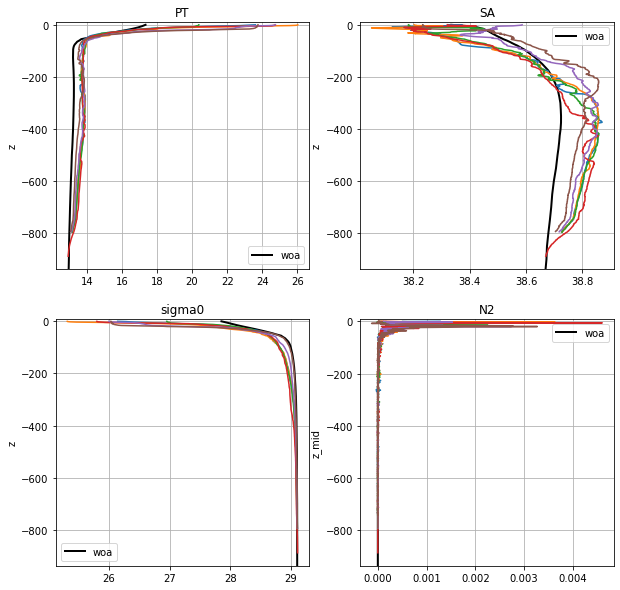

In [14]:
ds = data[6902969]
ds_smooth = hy.smooth(ds)

hy.plot_argo_profiles(ds, woa=woa);

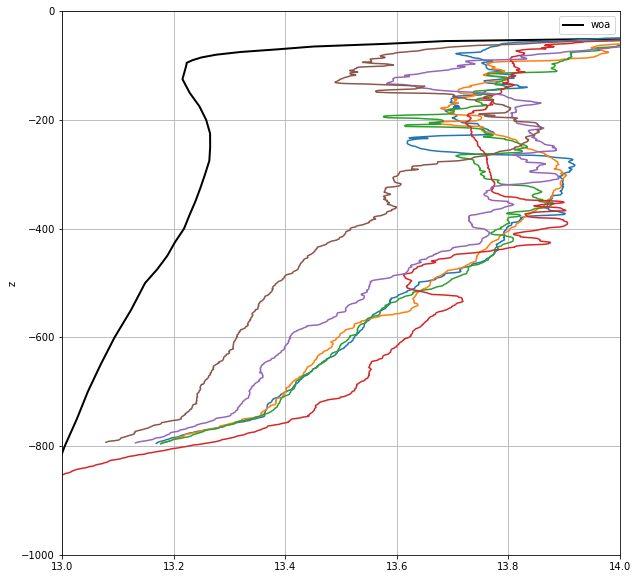

In [17]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

_da = ds["PT"]

woa["PT"].plot.line(y="z", color="k", lw=2, add_legend=False, ax=ax, label="woa")
_da.plot.line(y="z", add_legend=False, ax=ax)
ax.grid()
ax.set_xlabel("")
#ax.set_title(v)
ax.set_xlim((13,14))
ax.set_ylim(-1000,0)
ax.legend()

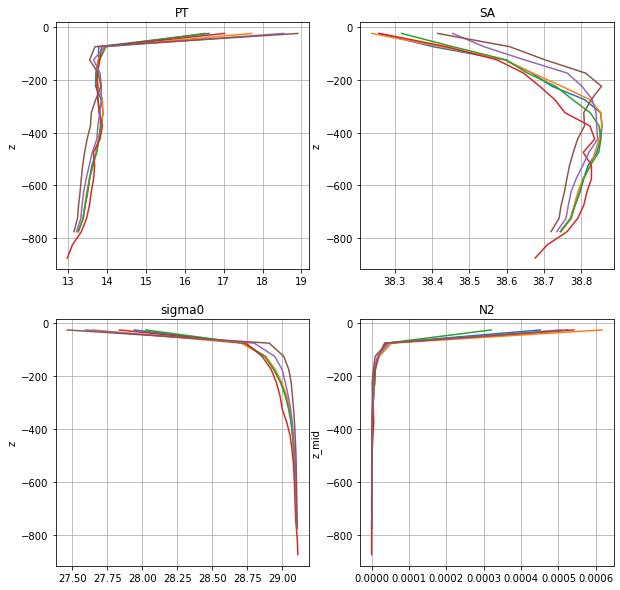

In [17]:
hy.plot_argo_profiles(ds_smooth);

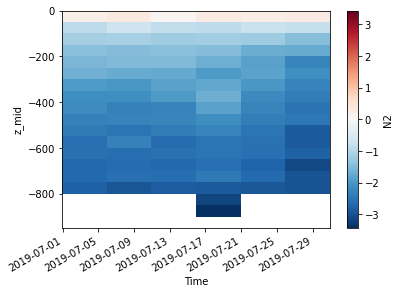

In [18]:
np.log10(ds_smooth.N2*hours).plot(y="z_mid"); # in cycles per hours

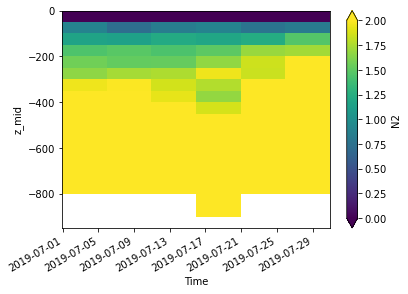

In [19]:
np.log10(1/ds_smooth.N2/hours).plot(y="z_mid", vmin=0, vmax=2);

Vertical gradient of temperature

Values are quickly around 1e-3 degC / m

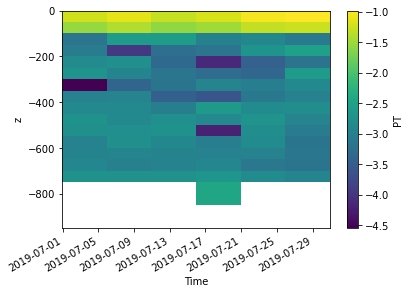

In [20]:
np.log10(abs(-ds_smooth.PT.differentiate("DEPTH"))).plot(y="z")